╒══════════════════════╤═════════╕
│ Metric               │   Value │
╞══════════════════════╪═════════╡
│ Inference Time (s)   │    1.55 │
├──────────────────────┼─────────┤
│ Number of Detections │    1    │
├──────────────────────┼─────────┤
│ Average Confidence   │    0.99 │
╘══════════════════════╧═════════╛


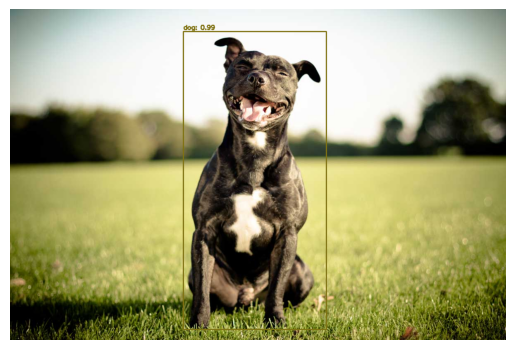

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import time
from tabulate import tabulate

# Load image, classes, and YOLO model
img = cv2.imread(r'D:\sem3\DL\test\happy-dog.jpg')
with open(r'D:\sem3\DL\test\coco.names', 'r') as f:
    classes = f.read().strip().split('\n')
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype='uint8')

# Load YOLO model (make sure you download yolov3.cfg and yolov3.weights)
cfg_path = r'yolov3.cfg'  # Path to yolov3.cfg
weights_path = r'D:\sem3\DL\test\yolov3.weights'  # Path to yolov3.weights
net = cv2.dnn.readNetFromDarknet(cfg_path, weights_path)

# Perform inference
net.setInput(cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False))
start = time.time()
outputs = net.forward(net.getUnconnectedOutLayersNames())
inference_time = time.time() - start

# Process detections
h, w = img.shape[:2]
boxes, confidences, classIDs = [], [], []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        classID, confidence = np.argmax(scores), scores[np.argmax(scores)]
        if confidence > 0.5:
            box = detection[:4] * [w, h, w, h]
            boxes.append([int(box[0] - box[2] / 2), int(box[1] - box[3] / 2), int(box[2]), int(box[3])])
            confidences.append(float(confidence))
            classIDs.append(classID)

# Apply NMS and draw boxes
detections_count = 0
total_confidence = 0
for i in cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4).flatten():
    x, y, width, height = boxes[i]
    color = [int(c) for c in colors[classIDs[i]]]
    cv2.rectangle(img, (x, y), (x + width, y + height), color, 2)
    cv2.putText(img, f"{classes[classIDs[i]]}: {confidences[i]:.2f}", (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Collect metrics
    detections_count += 1
    total_confidence += confidences[i]

# Calculate average confidence
average_confidence = total_confidence / detections_count if detections_count > 0 else 0

# Print performance metrics
metrics = [
    ["Inference Time (s)", f"{inference_time:.2f}"],
    ["Number of Detections", detections_count],
    ["Average Confidence", f"{average_confidence:.2f}"]
]

print(tabulate(metrics, headers=["Metric", "Value"], tablefmt="fancy_grid"))

# Show result
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [1]:
!pip install opencv-python numpy matplotlib tabulate